In [118]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

%matplotlib inline

In [119]:
M = 1000

# Reset the pseudo random number generator to the same value.
np.random.seed(1012019)

x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)

y = x1 + x2 + np.random.randn(M, 1)

# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

In [120]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

In [121]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat) )

In [122]:
# Number of epochs.
n_epochs = 1
# Constant learning rate.
alpha = 0.3

# Mini-batch size.
minibatch_size = 100

# Random initialization of parameters.
a = np.random.randn(2,1)
a[0] = -10
a[1] = -10

# Create vector for parameter history.
a_hist = np.zeros((2, n_epochs*M+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create vector to store eta history.
alpha_hist = np.zeros((n_epochs*M))

# Create array for storing error values.
Jgd = np.zeros(n_epochs*M+1)

Jgd[0] = (1/minibatch_size)*sum(np.power(y - X.dot(a), 2))

grad_hist = np.zeros((2, n_epochs*M))

inc = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(M)
    X_b_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, M, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = -2/minibatch_size * xi.T.dot(yi - xi.dot(a))
        grad_hist[0, epoch*M+inc] = gradients[0]
        grad_hist[1, epoch*M+inc] = gradients[1]
        a = a - alpha * gradients
        a_hist[0, epoch*M+inc+1] = a[0]
        a_hist[1, epoch*M+inc+1] = a[1]
        Jgd[epoch*M+inc+1] = (1/minibatch_size)*sum(np.power( (y - X.dot(a)) , 2)) # Aqui você deve dividir pelo tamanho do mini-batch (no meu exemplo estava errado também, me desculpe)
        inc = inc + 1 # voce deve criar um novo contador pois caso contrário as arrays terão valores a cada mini-batch e zeros nos outros índices.

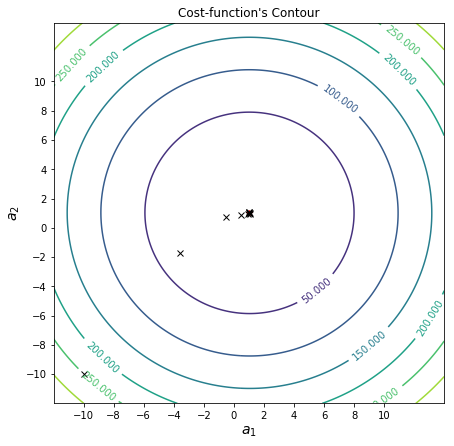

In [123]:
# Plot contour figure.        
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:inc+1], a_hist[1, 0:inc+1], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

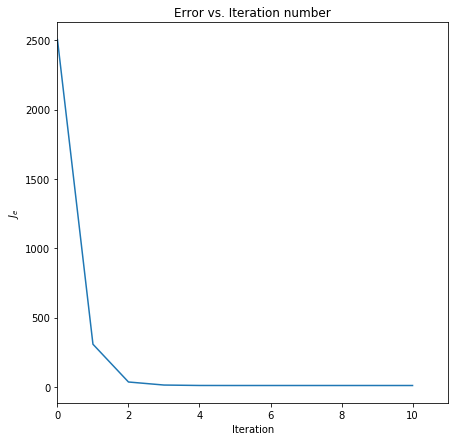

In [124]:
fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, inc+1), Jgd[0:inc+1])
plt.xlim((0, inc+1))
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

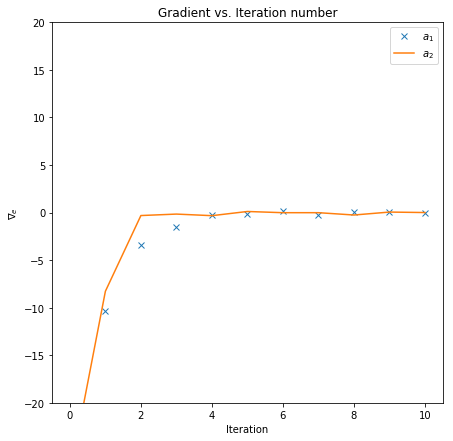

In [125]:
fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, inc+1), grad_hist[0,0:inc+1], 'x', label='$a_1$')
plt.plot(np.arange(0, inc+1), grad_hist[1,0:inc+1], label='$a_2$')
plt.ylim([-20, 20])
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()